# Exploratory Data Analysis on 'Cardio Good Fitnesss' - The Case Study.
#### Case study 1 - Ajinkya Sonawane (PGA-33).
#### Datasets:
1. CardioGoodFitness.csv

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df_cgf=pd.read_csv('CardioGoodFitness.csv')

In [7]:
df_cgf.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [8]:
df_cgf.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [9]:
df_cgf.shape

(180, 9)

**Observation**
There are 180 rows and 9 columns in the dataset

In [10]:
df_cgf.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

**Observation**
- There are 3 features with object data type instances: Product, Gender, Martial Status 
- There are 6 features with integer data type instances: Age,Education,Usage,Fitness,Income,Miles. 

In [11]:
df_cgf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


## Data Preprocessing:

In [12]:
#changing it to  object dtype to category  to save memory
df_cgf.Product=df_cgf["Product"].astype("category")
df_cgf.Gender=df_cgf["Gender"].astype("category")
df_cgf.MaritalStatus=df_cgf["MaritalStatus"].astype("category")

In [13]:
df_cgf.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [14]:
df_cgf.duplicated().sum()

0

**Observation** There are no missing or duplicate values.

In [15]:
for (colname,colval) in df_cgf.iteritems():
    print('{} : {}'.format(colname,df_cgf[colname].unique()))

Product : ['TM195', 'TM498', 'TM798']
Categories (3, object): ['TM195', 'TM498', 'TM798']
Age : [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Gender : ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Education : [14 15 12 13 16 18 20 21]
MaritalStatus : ['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']
Usage : [3 2 4 5 6 7]
Fitness : [4 3 2 1 5]
Income : [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
Miles : [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200

**Observation**
- The company has 3 products in their portfolio namely 'TM195', 'TM498', 'TM798'
- There are both Partnered and Single customer in Database
- Customer Age ranges from 18 to 50
- Education is ordered between 12 and 21
- Usage is between 2 to 7 days a week
- Customer Fitness level is ordered between 1 to 5

In [16]:
df_cgf.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Observation**
- The age range for customers is between 18 and 50. Average age of the customer is 28.78 and Median is 26.
- The customers' education is between 12 and 21. Average customer education is 15.57 and Median is 16.
- Customer usage is between 2 and 7 days a week. Average usage is 3 days a week and Median is 3.
- The fitness level of customers is between 1 and 5. Average fitness level of customers is 3.3 and Median is 3.
- Incomes of customers is in range of 29.5K and 100k. Average income is 53K and Median is 50K.
- Customer expects to runs on an average of 103.19 miles per week, median 94 miles per week.

In [17]:
df_cgf.Gender.value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

**Observation** There total 104 Males and 76 females as customers in the given dataframe.

In [18]:
df_cgf.Product.value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

**Observation**
- The TM195 is the most sold product with 80 count.
- TM498 and TM798 is sold 60 and 40 times respectively.

In [19]:
df_cgf.MaritalStatus.value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

**Observation**
There are total 107 Partnered customers and 73 single customers in the data frame

In [20]:
df_cgf[df_cgf['Product']=='TM195'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


**Observation for TM195 Model**
- 80 Customers brought TM195 Model. Average Age buying TM195 is 28.5. Median is 26 Hence Data is Right Skewed.
- Average Education is 15 and Median is 16.
- Average Usage is 3 days a week and Median is also 3.
- Expected Fitness is 2.9 and Median is 3.
- Average income is 46K
- Average Miles run are 82.78 and Median is 85.

In [21]:
df_cgf[df_cgf['Product']=='TM498'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


**Observation for TM498 Model**
- 60 Customers brought TM498 Model. Average Age buying TM195 is 28.9. Median is 26 Hence Data is Right Skewed.
- Average Education is 15 and Median is 16.
- Average Usage is 3 days a week and Median is also 3.
- Expected Fitness is 2.9 and Median is 3.
- Average income is 49K
- Average Miles run are 87.9 and Median is 85.

In [22]:
df_cgf[df_cgf['Product']=='TM798'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.100,6.971738,22.0,24.75,27.0,30.25,48.0
Education,40.0,17.325,1.639066,14.0,16.00,18.0,18.00,21.0
Usage,40.0,4.775,0.946993,3.0,4.00,5.0,5.00,7.0
Fitness,40.0,4.625,0.667467,3.0,4.00,5.0,5.00,5.0
Income,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.00,104581.0
Miles,40.0,166.900,60.066544,80.0,120.00,160.0,200.00,360.0


**Observation for TM798 Model**
- 40 Customers brought TM798 Model. Average Age buying TM798 is 29. Median is 27 Hence Data is Right Skewed.
- Average Education is 17 and Median is 18.
- Average Usage is 5 days a week and Median is also 5.
- Expected Fitness is 5 and Median is 5.
- Average income is 75K
- Average Miles run are 167 and Median is 160.

# Univariate Analysis

In [23]:
def uni_analysis(data,colors):
    Name=data.name.upper()
    plt.figure(figsize=(17,7))
    
    plt.subplot(1,3,1)
    sns.distplot(data,color=colors)
    plt.axvline(data.mean(), color='y', linestyle='--',linewidth=2)
    plt.axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    plt.axvline(data.mode()[0],color='g',linestyle='solid',linewidth=2)
    plt.legend({'Mean':data.mean(),'Median':data.median(),'Mode':data.mode()})

    plt.subplot(1,3,2)
    sns.boxplot(data,color=colors)

    plt.subplot(1,3,3)
    sns.violinplot(data,color=colors)
    
    plt.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold');

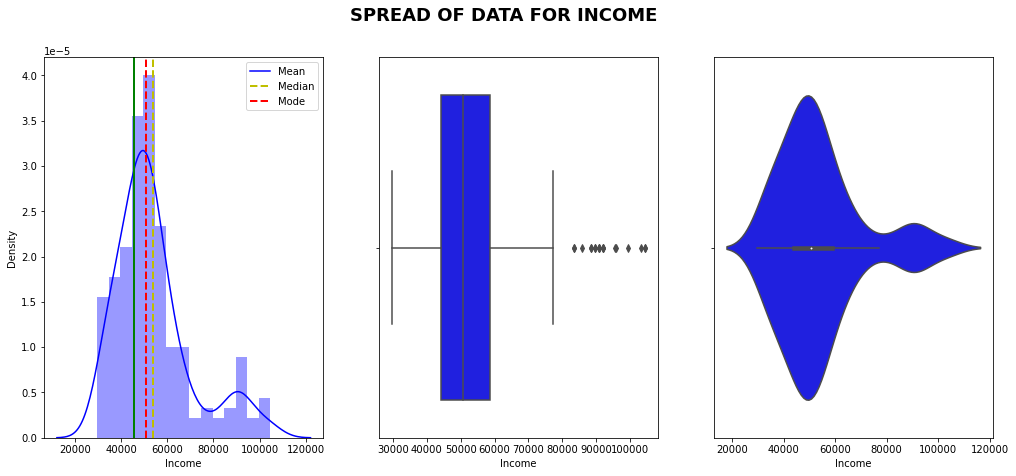

In [24]:
uni_analysis(df_cgf['Income'],'blue')

**Observations:**
   - Income is skewed towards right , Median is 50K , Mean is 55k and mode is $45K. 
   - Most of the customers are in lower pay range  and earn less than 70K.
   - Income has some outliers. Few customers earn beyond 80K. 

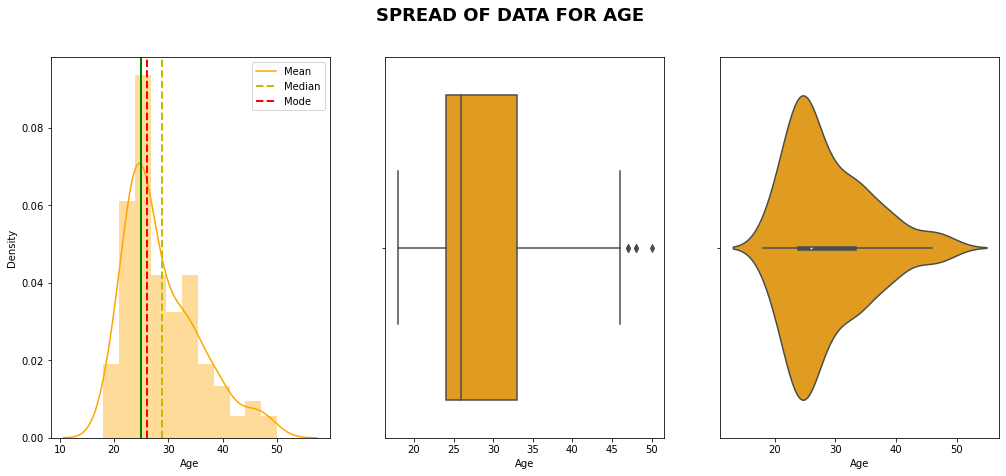

In [25]:
uni_analysis(df_cgf['Age'],'orange')

**Observations:**
   - Age is skewed towards right.
   - Customers buying treadmill are younger and average age of customer is 28 , median is 26 and mode is 25  
   - Customers buying treadmill after age of 40  and before 20 are very less.

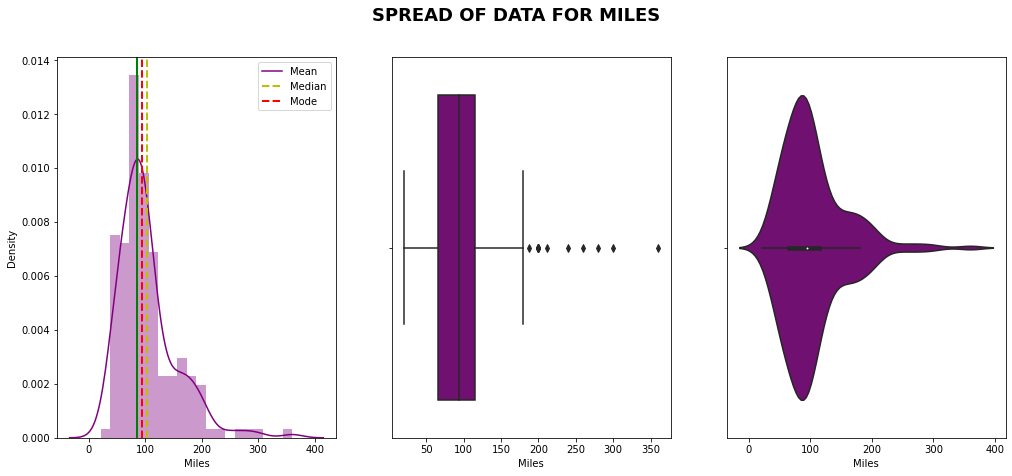

In [26]:
uni_analysis(df_cgf['Miles'],'purple')

**Observations:**
   - Miles is skewed towards right.
   - Customers expect to run  on an average 80 miles per week.
   - There are some outliers, where customers are expecting to run more than 200 miles per weak.

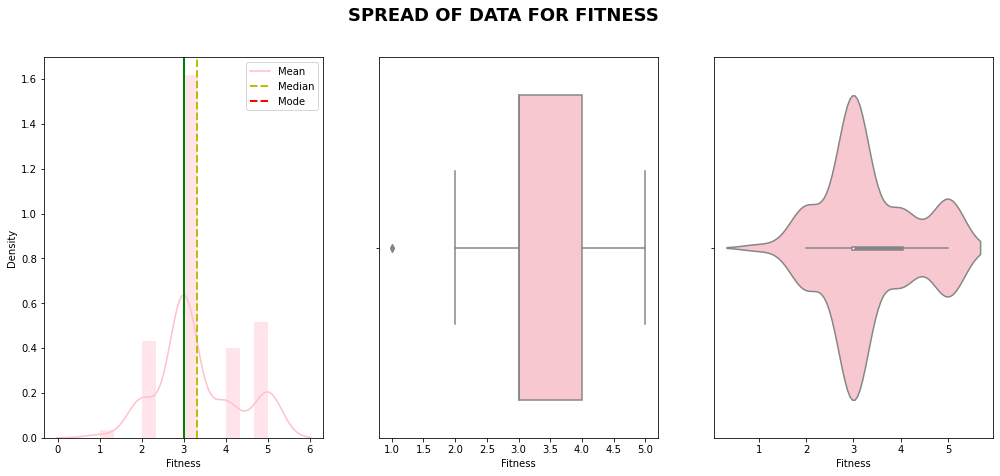

In [27]:
uni_analysis(df_cgf['Fitness'],'pink')

**Observations**
   - Most of the customers have self-rated their fitness as 3( average).

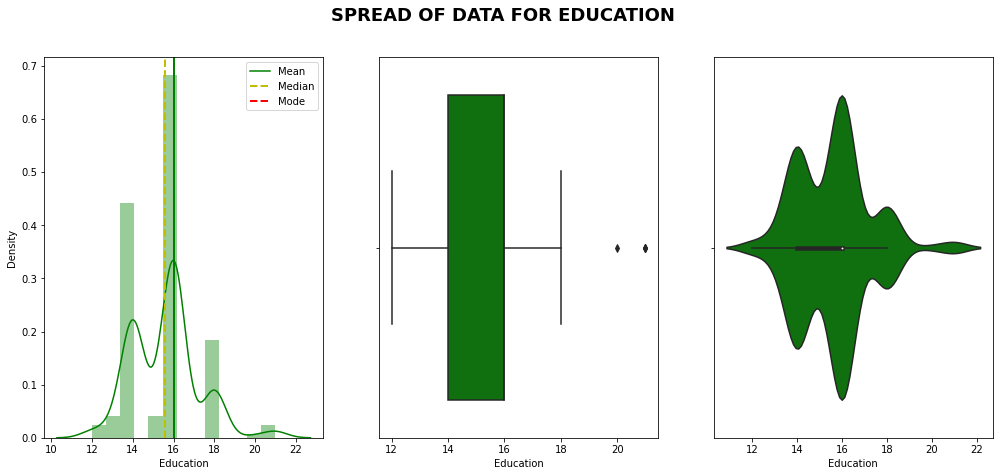

In [28]:
uni_analysis(df_cgf['Education'],'green')

**Observations**
- Most of the customers have 16 year of education (assuming them to be college graduates or bachelors).
- There are few outliers.

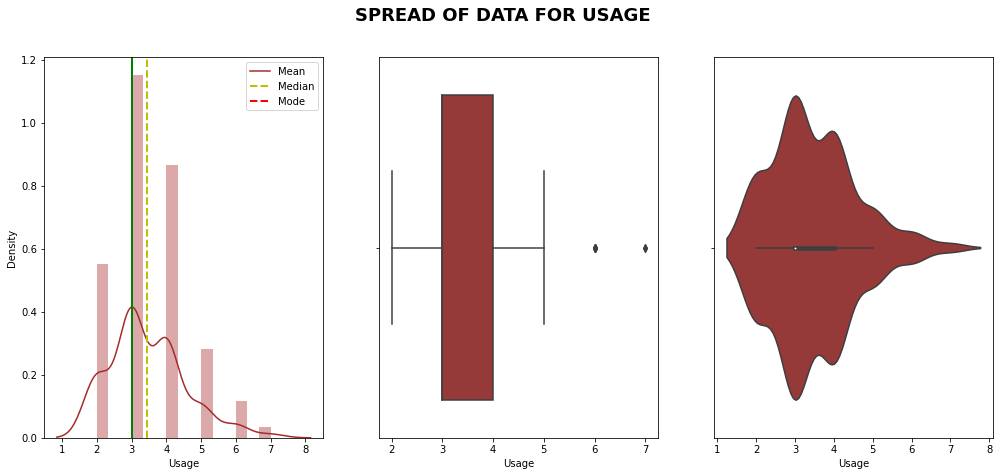

In [29]:
uni_analysis(df_cgf['Usage'],'brown')

**Observations**
   - Most of customers expect they will be using the treadmill 3-4 days per week.
   - There are few  outliers where customer are expecting to use treadmill for 6 or 7 times a week

## Product Distribution

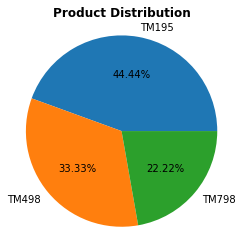

In [57]:
fig,ax=plt.subplots()
ax.pie(df_cgf['Product'].value_counts(),labels=df_cgf['Product'].unique(),autopct='%.2f%%',radius=1.1)
ax.set_title('Product Distribution',fontweight='bold');

## Product wise Sale

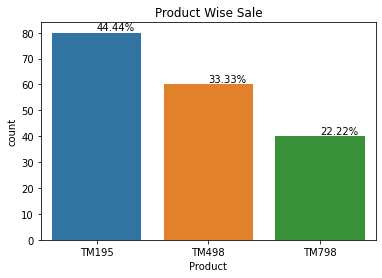

In [31]:
sns.countplot(df_cgf['Product'])
plt.text(x=-0,y=81,s=str(round(df_cgf.Product.value_counts()[0]/len(df_cgf)*100,2))+'%')
plt.text(x=1,y=61,s=str(round(df_cgf.Product.value_counts()[1]/len(df_cgf)*100,2))+'%')
plt.text(x=2,y=41,s=str(round(df_cgf.Product.value_counts()[2]/len(df_cgf)*100,2))+'%')
plt.title('Product Wise Sale');

## Gender Wise Sale

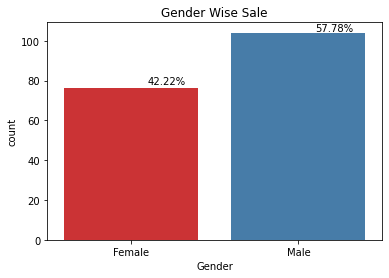

In [32]:
sns.countplot(df_cgf['Gender'],palette='Set1')
plt.text(x=0.1,y=78,s=str(round(df_cgf.Gender.value_counts()[1]/len(df_cgf)*100,2))+'%')
plt.text(x=1.1,y=105,s=str(round(df_cgf.Gender.value_counts()[0]/len(df_cgf)*100,2))+'%')
plt.title('Gender Wise Sale');

## Marital Status wise Sale

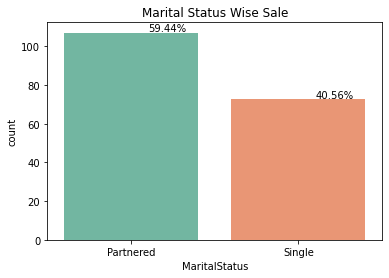

In [33]:
sns.countplot(df_cgf['MaritalStatus'],palette='Set2')
plt.text(x=0.1,y=108,s=str(round(df_cgf.MaritalStatus.value_counts()[0]/len(df_cgf)*100,2))+'%')
plt.text(x=1.1,y=73,s=str(round(df_cgf.MaritalStatus.value_counts()[1]/len(df_cgf)*100,2))+'%')
plt.title('Marital Status Wise Sale');

#### **Observation:**
   - 44.4% customers brought TM195. TM195  model is the most  purchased model. TM498 was purchased more than TM798.
   - 57.8% male brought Treadmill.There are more Male customers  than Female customers.
   - 59.4% of the customers who purchased treadmill are Married.
   

# Bivariate Analysis

## Product by Gender

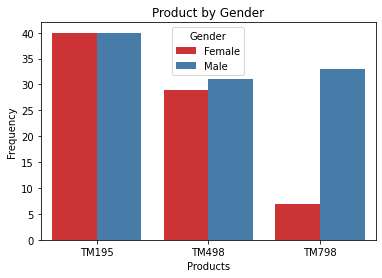

In [34]:
sns.countplot(df_cgf['Product'],hue=df_cgf['Gender'],palette='Set1')
plt.title('Product by Gender')
plt.xlabel("Products")
plt.ylabel("Frequency");

**Observation**
- TM195 model was equally bought my Male and Female
- Compared to females, male bought  TM498 model .
- TM798 model is popular in Males than in female.

## Product by Marital status

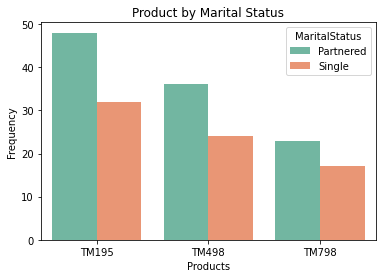

In [35]:
sns.countplot(df_cgf['Product'],hue=df_cgf['MaritalStatus'],palette='Set2')
plt.title('Product by Marital Status')
plt.xlabel("Products")
plt.ylabel("Frequency");

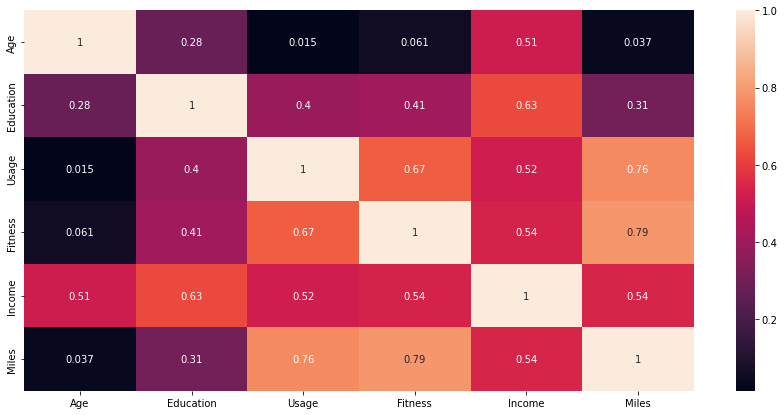

In [36]:
plt.figure(figsize=(15,7))
sns.heatmap(df_cgf.corr(), annot=True);

In [60]:
corr_pairs = df_cgf.corr().unstack() # give pairs of correlation
print( corr_pairs[abs(corr_pairs)>0.5]) # Gives us correlated data

Age        Age          1.000000
           Income       0.513414
Education  Education    1.000000
           Income       0.625827
Usage      Usage        1.000000
           Fitness      0.668606
           Income       0.519537
           Miles        0.759130
Fitness    Usage        0.668606
           Fitness      1.000000
           Income       0.535005
           Miles        0.785702
Income     Age          0.513414
           Education    0.625827
           Usage        0.519537
           Fitness      0.535005
           Income       1.000000
           Miles        0.543473
Miles      Usage        0.759130
           Fitness      0.785702
           Income       0.543473
           Miles        1.000000
dtype: float64


**Observation**
- Age and Income has some  in significant correlation
- Education and Income has very little correlation
- There is some corelation between Usage and Income
- Fitness and miles are corelated
- TM798 model is correlated to Education, Usage,Fitness, Income and Miles. 
- Miles and usage are positively correlated

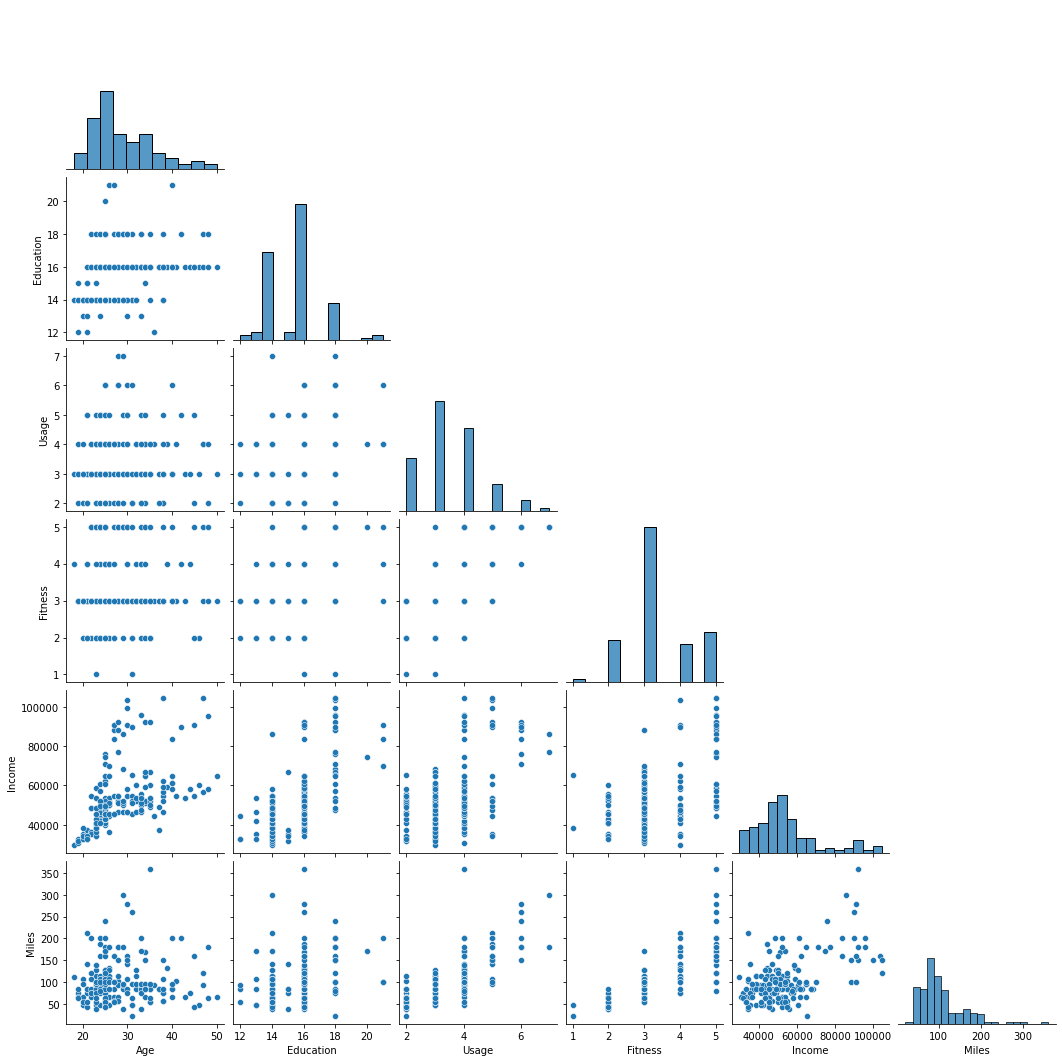

In [37]:
sns.pairplot(df_cgf,corner=True);

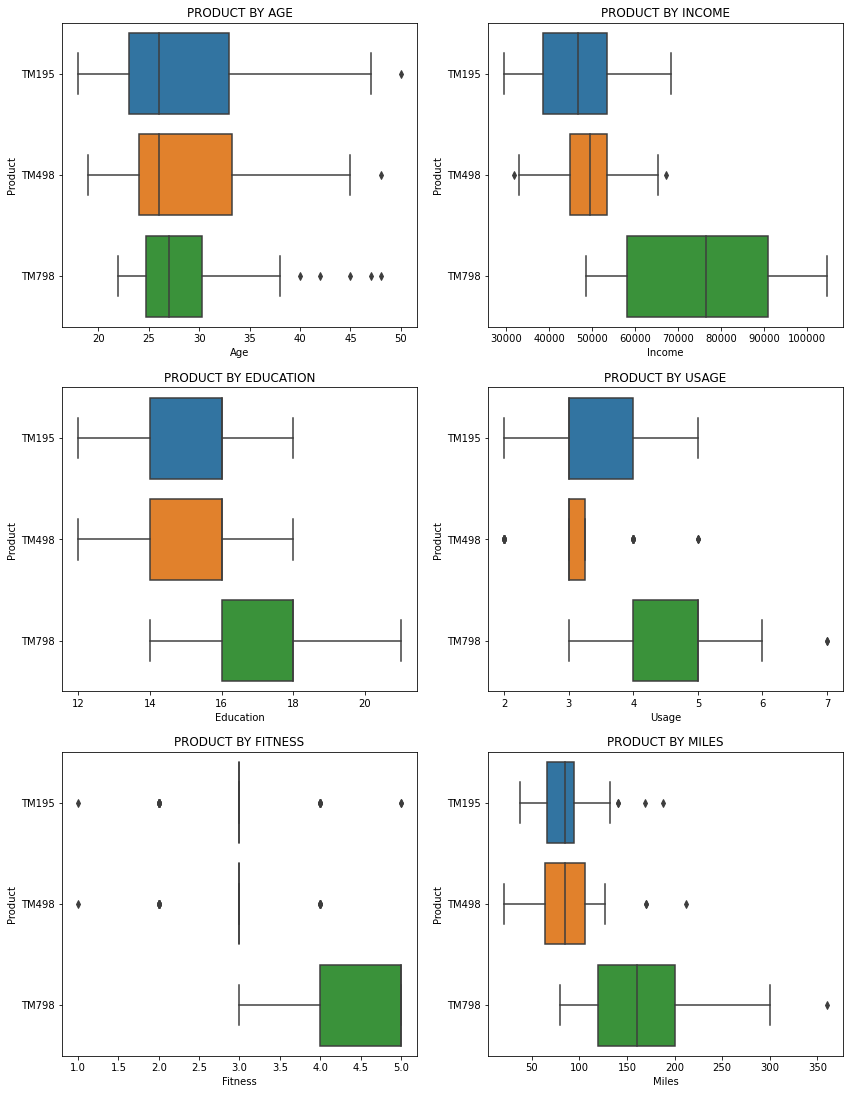

In [38]:
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
fig1, axes1 =plt.subplots(3,2,figsize=(14, 19))
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(df_cgf[list1_col[i]],df_cgf['Product'],ax=ax).set(title='PRODUCT BY ' + list1_col[i].upper())

**Observations:-**
 - There are many outliers for TM798 ,customers are more than age of 40 .
 - Age of customers buying TM195 and TM498 is between 20-35, where as customers buying TM798 are primarily in 25-30 
 - Customers with higher income and more education have purchased TM798 model.
 - Customers with lower income  purchase TM195 and TM498 model may be because of cost of the Treadmill
 - Customer with TM 195 expect to use treadmill  3-4 times a week and have 
   average self rated fitness as 3 and some unfits.
 - Customers who bought TM498 model expecting to use Treadmill less frequently but to run more miles a week.
 - Customer buying TM798 plan to use it more frequently , run more miles and have high self rated fitness .They seem to be more health conscious or professionals.
 - TM 798 model was purchased more by males customer than female customers .
 -  More partnered customer tend to buy TM798 than Single customers

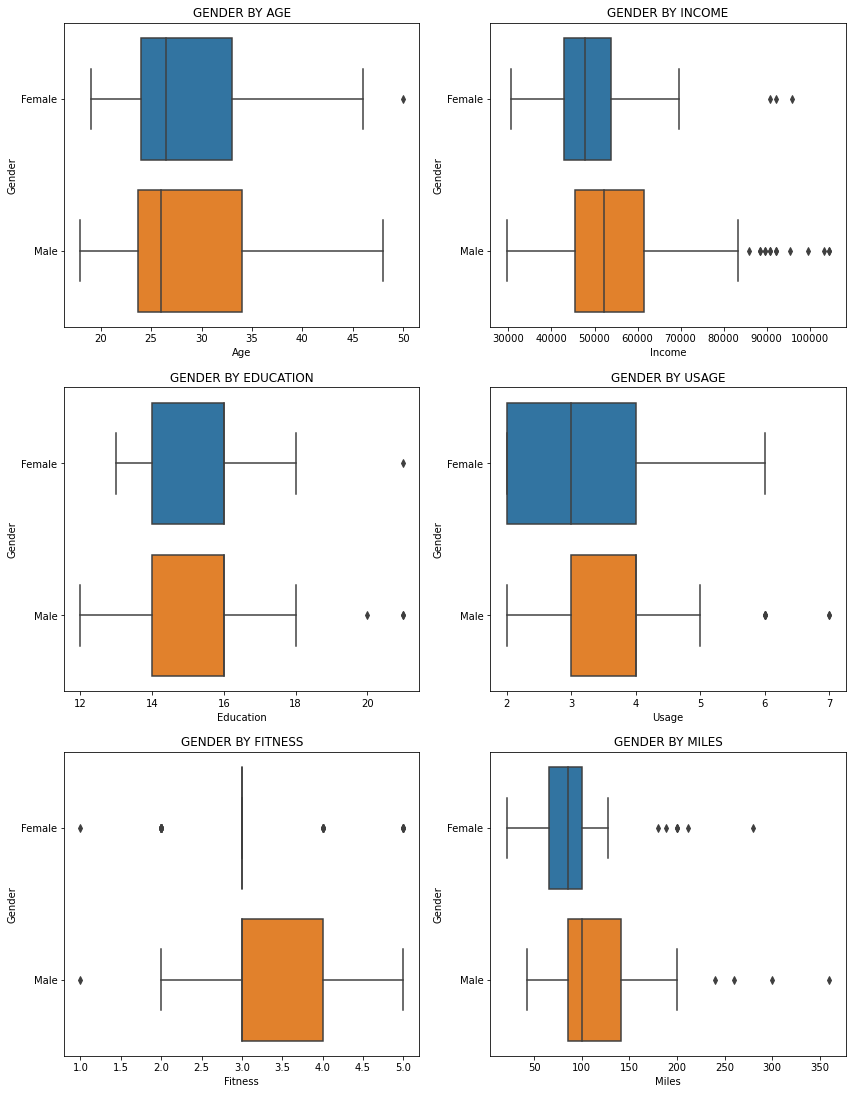

In [39]:
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
fig1, axes1 =plt.subplots(3,2,figsize=(14, 19))
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(df_cgf[list1_col[i]],df_cgf['Gender'],ax=ax).set(title='GENDER BY ' + list1_col[i].upper())

**Observations:-**
   - Male customers earn more than Female customers.
   - Males Customer have higher self rated fitness than female.
   - Expected Usage and miles covered on  tread mill is less in Female customers than male customers.
   - Female in age range 23-33 purchased the treadmill.
   - Education of Male and Female customers is same.

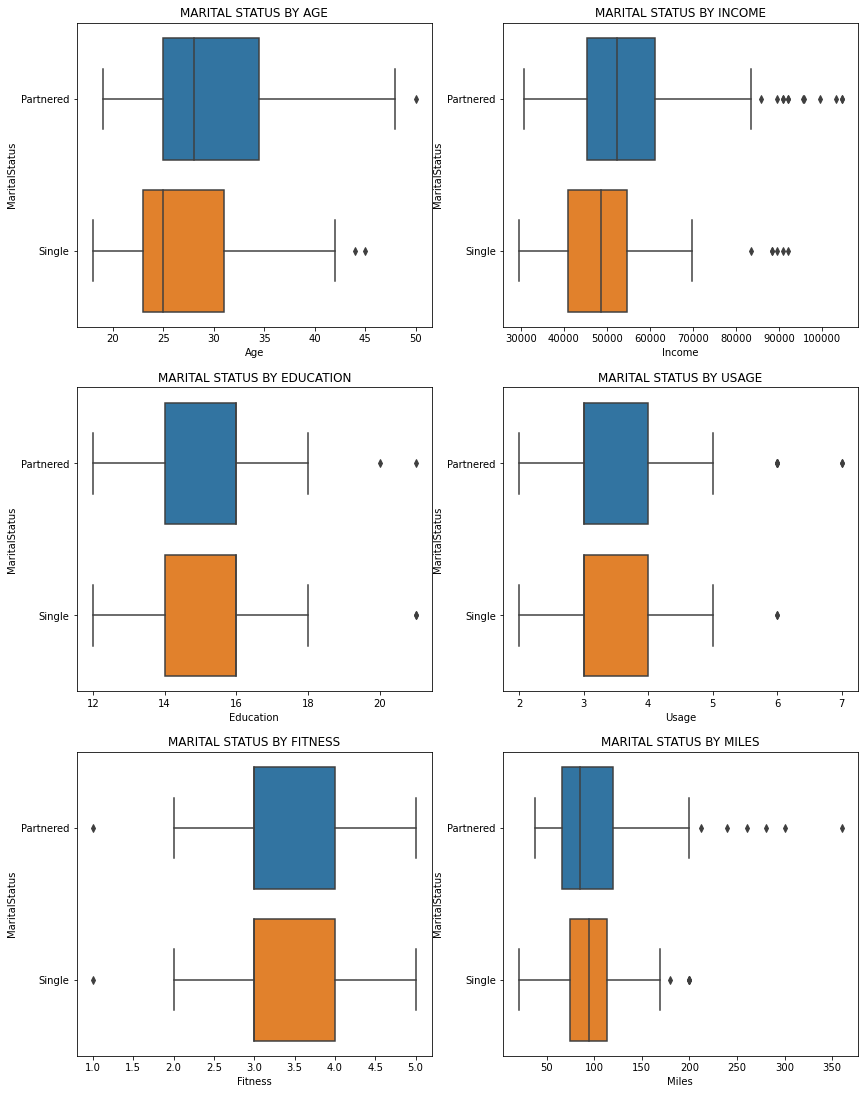

In [40]:
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
fig1, axes1 =plt.subplots(3,2,figsize=(14, 19))
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(df_cgf[list1_col[i]],df_cgf['MaritalStatus'],ax=ax).set(title='MARITAL STATUS BY ' + list1_col[i].upper())

**Observations**
 - Partnered customer  expects to run more miles compared to single
 - Income of Partnered customer is more than income of single customer.
 - Age of Partnered customer is more than Age of single customer
 - There are  more single males buying Treadmill than single Females
 - Self rated Fitness of both Partnered and Single customer are same.
 - Education of both Partnered and Single customer is same

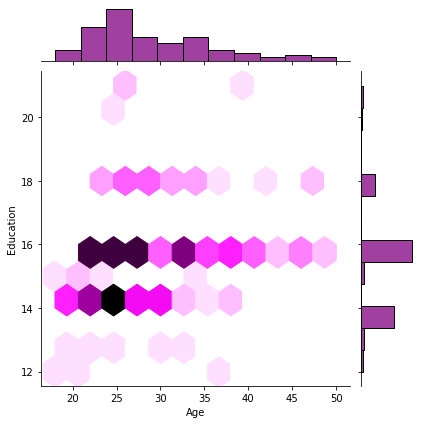

In [41]:
sns.jointplot(df_cgf['Age'],df_cgf['Education'],kind='hex',color='purple');

**Observation:-**
   - Customer between age 20-40 have 14 -16 years of education

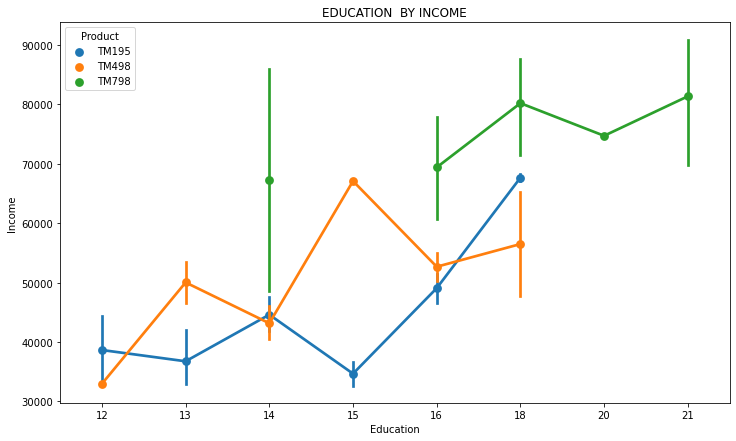

In [42]:
plt.figure(figsize=(12,7))
sns.pointplot(df_cgf["Education"],df_cgf["Income"],hue=df_cgf['Product'])
plt.title('EDUCATION  BY INCOME');

**Observation:-**
   - Education and Income are  correlated.
   - TM798 has higher income and higher education

## Multivariate Analysis

<Figure size 864x504 with 0 Axes>

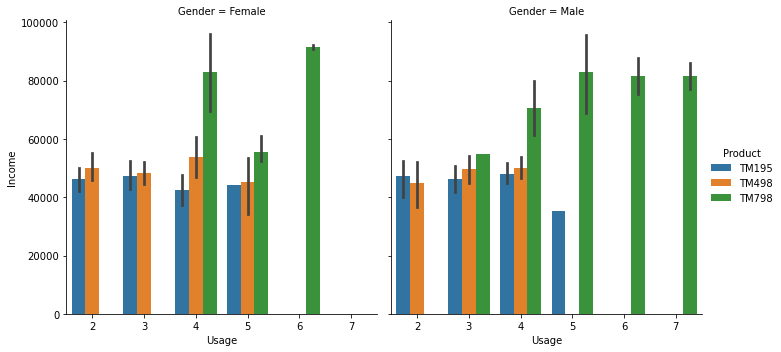

In [43]:
plt.figure(figsize=(12,7))
sns.catplot(x='Usage', y='Income', col='Gender',hue='Product' ,kind="bar", data=df_cgf);

**Observations**
  - Male customer with higher income ,bought TM798 Model and expect to use treadmill 4-6 /week
  - Customer who bought TM195 and TM498 are in same income range and expect to use treadmill 3-4 /week

In [44]:
prd_mar_gen= pd.crosstab(index=df_cgf["Product"],columns=[df_cgf["MaritalStatus"],df_cgf["Gender"]])  
prd_mar_gen

MaritalStatus Partnered      Single     
Gender           Female Male Female Male
Product                                 
TM195                27   21     13   19
TM498                15   21     14   10
TM798                 4   19      3   14

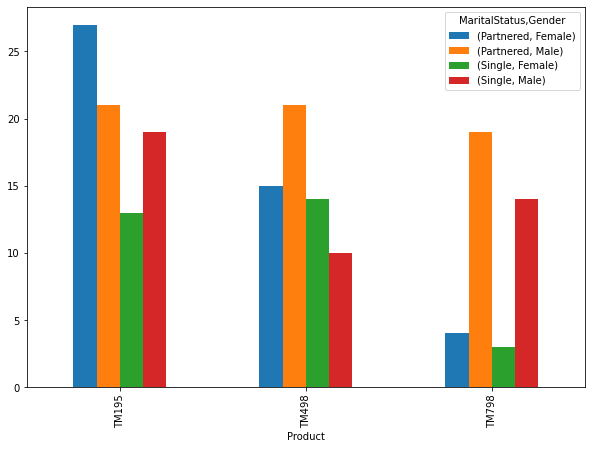

In [45]:
prd_mar_gen.plot(kind='bar',figsize=(10,7));

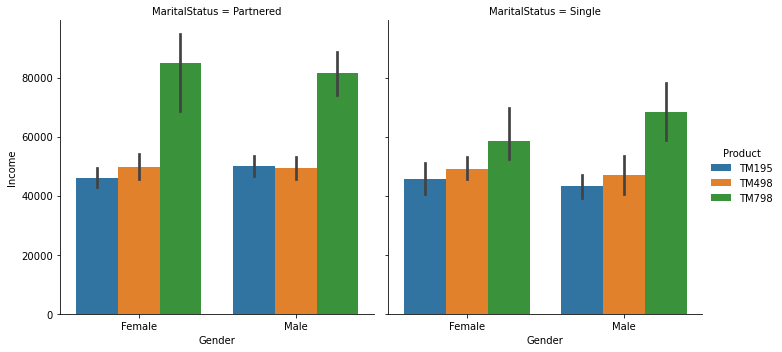

In [46]:
sns.catplot(x='Gender',y='Income', hue='Product', col='MaritalStatus', data=df_cgf,kind='bar');

In [47]:
prod_gen_fit=pd.crosstab(index=df_cgf['Product'],columns=[df_cgf['Gender'],df_cgf['Fitness']])
prod_gen_fit

Gender  Female               Male              
Fitness      1   2   3  4  5    1  2   3  4   5
Product                                        
TM195        0  10  26  3  1    1  4  28  6   1
TM498        1   6  18  4  0    0  6  21  4   0
TM798        0   0   1  1  5    0  0   3  6  24

**Observations**
 - Partnered Female bought TM195 Model compared to Partnered male.
 - Single Female customers bought TM498 model more than Single male customers.
 - Partnered Male customers bought TM798 model more than Single Male customers.
 - There are  more single males buying Treadmill than single Females.
 - Single Male customers bought TM195 Model compared to Single Female.
 - Majority of people who buy the TM798 are man & partnered.
 - The majority of our buyers are man.

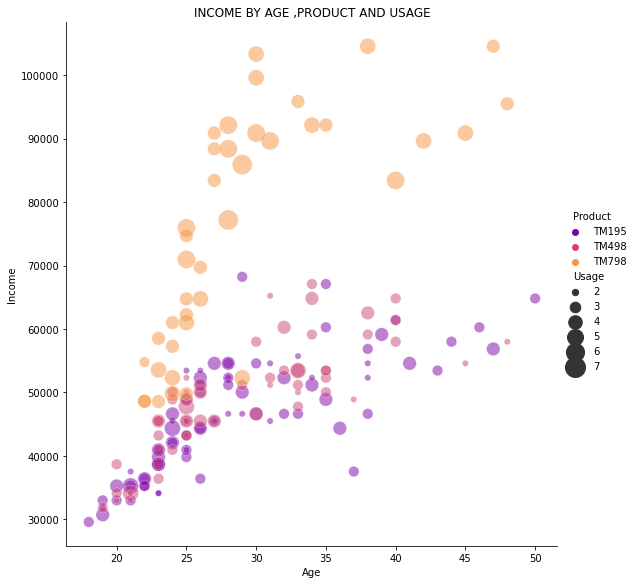

In [48]:
sns.relplot(x="Age", y="Income", hue="Product", size="Usage",
            sizes=(40, 400),height=8,alpha=.5,palette="plasma",data=df_cgf).set(title='INCOME BY AGE ,PRODUCT AND USAGE');

**Observations**:
 - Products TM195 and TM498 are bought by people with lower than 70K as income and age is concentrated more in  range of 23-35
 - Product TM798 is mainly bought by people with higher than 70K income and age falls in range of 23-30.
 -Majority of people who buys the TM798 expect that they will run more than consumers of the other two products, on average.

# Conclusion
## Important Observations
- 44.4% customers brought TM195. TM195 model is the most purchased model. TM498 was purchased more than TM798.
- 57.8% male brought Treadmill. There are more Male customers than Female customers.
- 59.4% of the customers who purchased treadmill are partnered.
- Average Usage of Males is more than Average usage of Females.
- Customers buying treadmill are younger and average age of customer is 28, median is 26 and mode is 25  
- Most of the customers are in lower pay range and earn less than 70K.   
- Average Education is 16 and median is 18.

## Customer Profiles of Models
##### <span style="color:blue"> </span>
**TM195**
-  44.4% customers brought TM195. Making it most popular model.
-  Average customer income is 46K
-  Customers who bought this treadmill have income less than 60k with an average of 55K.
-  There are same numbers of Male and Female customers
-  Average age of customer who purchases TM195 is 28.5, Median is 26.
-  Average years of Education of customers is 15, and median is 16 assuming it to be bachelors.
-  Self rate fitness level of customer is average.
-  They expect to use treadmill 3-4 times a week.
   
   Our 44.4% sale has come from this model. Majority of people whose income is around 55K has purchased this model assuming it’s because of its appealing price and affordability. Equal amount of males and females bought this model suggesting this model is not gender specfic. Majority of the customers who purchased this model are Partnered Females and Single Males compared to Single females and Partnered male. This may be cause of the features this treadmill provides and the cost of treadmill. Customers who bought this treadmill believe there fitness is average, and might be looking for a basic treadmill that does the job.

**TM498**
- This Model is sold more than TM798 model
- Average Income of the customer is 48,973
- Customers with lower income purchase TM195 and TM498 model may be because of cost of the Treadmill
- Average age of customer who purchases TM498 is 28.9 , Median is 26 . Customer range is between 24-33.
- Average years of Education of customers is 16 assuming it to be bachelor's

   Sale was 33%.This was the 2nd most sold model. The income of this group is almost same as TM195 model.  TM498 model expecting to use Treadmill less frequently but to run more miles a week.Single Female customers bought TM498 model more than Single male customers, may be cause of some feature difference.

**TM798**
- Average age of customer who purchases TM798 is 29 , Median is 27 . There are some outliers , suggesting we need explore more  closely customers who are above 40  for any possibility of new customers. 
- Average Education is 17 and median is 18, suggest they have some advanced education
- Expected usage is 4-5 day a week
- Expected Miles to run is on an Average 166 miles per week and median is 160.
- Average Income is 75K and median is 76K
- Product made only 22 % of sales.

  This treadmill seems to be more popular with customer having high income and Partnered Male customer .This may be more costlier compared to other two models. Treadmill may have some advanced features and people with high income are ready to spend more money  to buy this model.Male customers who are more serious about fitness or Professionals buy  this model.Customer's self rated fitness is between 3 -5 and expected usage is more than 4 days, suggest they  have  been working out  and  might be looking for a upgrade from there existing treadmill model.
  
## Recommendations:
 - TM195 & TM498 attracts people with income less than 60k , may be because of cost of both models. We should  market these models  as a budget Treadmill for all.
 - TM798 should be marketed as a high end Treadmill for professionals and athletes. Create a luxiurous brand image for this  Treadmill.
 - Assuming TM 798 provides high margin of profit, we should brand it as Treadmill for athletes. We can also endorse some athlete to promote this Treadmill. This might increase there sales.
 - Considering above observations, We can attract customers to upgrade from their existing treadmill and switch to TM798 ,highlighting extra features this Treadmill provides.
 - To expand  our sales with Female customers, We could  run a marketing campaign during Women's days, Mothers days emphasizing on fitness and exercise. 
 - The age of our customers are in the range of 35 years old and 18 years old. We need to research if there is any scope to increase sale with customers who are more than 35 years old.
